In [13]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.cm as cm

import requests

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
baseURL = 'http://pds-imaging.jpl.nasa.gov/w10n/'
dataURL = 'mer1-m-pancam-2-edr-ops-v1.0/mer1po_0xxx/data/'
product = 'edr'
formatURL = '?output=json'

data = {}
for sol in range(700,900):
    data[sol] = {}

for sol in data.keys():
    URL = '{baseURL}{dataURL}sol{sol}/{product}/'.format(baseURL=baseURL, dataURL=dataURL,
                                                         sol='{0:0>4}'.format(sol), product=product)
    try:
        allimg = requests.get(URL+formatURL).json()
        for img in allimg['leaves']:
            if 'eff' in img['name']:
                seq = img['name'][-13:-7]
                if not seq in data[sol].keys():
                    data[sol][seq] = [img['name']]
                else:
                    data[sol][seq]+=[img['name']]
    except:
        print URL+formatURL


http://pds-imaging.jpl.nasa.gov/w10n/mer1-m-pancam-2-edr-ops-v1.0/mer1po_0xxx/data/sol0768/edr/?output=json


In [3]:
#for sol in data.keys():
#    print sol
#    for seq in data[sol].keys():
#        nimg = len(data[sol][seq])
#        if nimg>1:
#            print seq
#            for img in data[sol][seq]:
#                print img

1p192545427eff64lcp2596l2m1.img
1p192545448eff64lcp2596l3m1.img
1p192545481eff64lcp2596l4m1.img
1p192545513eff64lcp2596l5m1.img
1p192545538eff64lcp2596l6m1.img
1p192545567eff64lcp2596l7m1.img


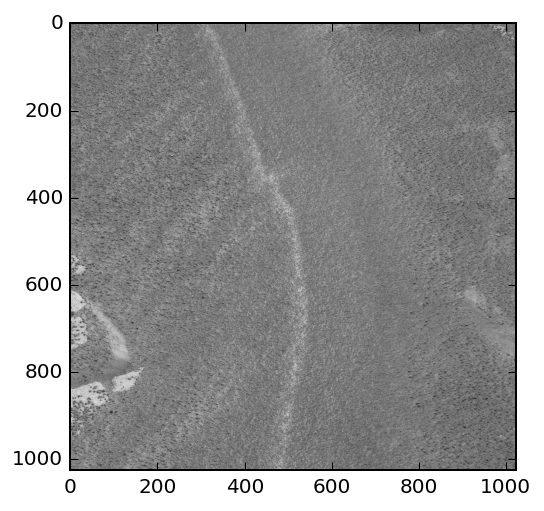

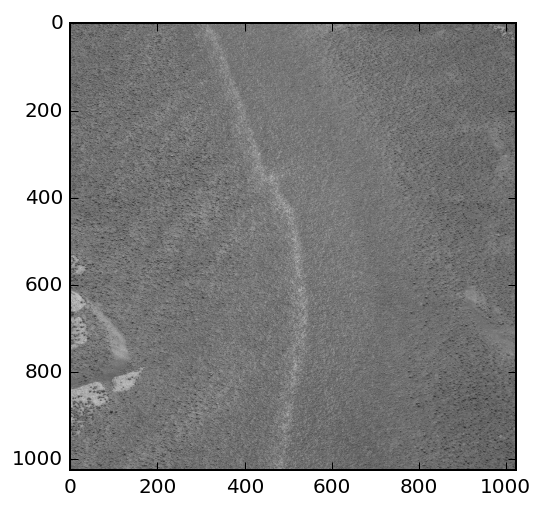

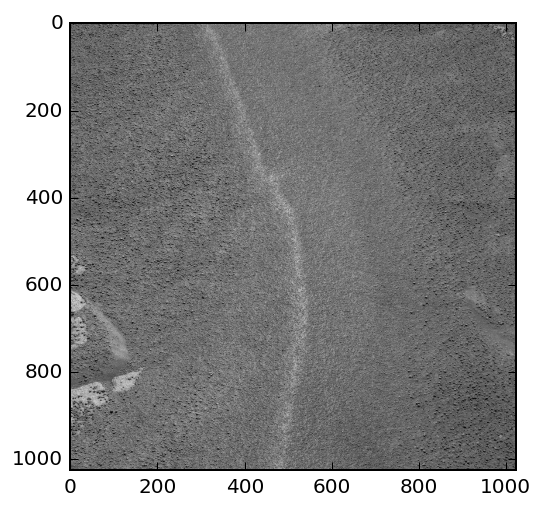

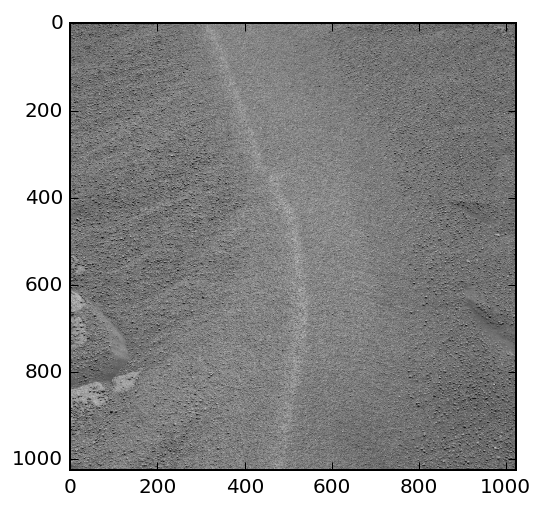

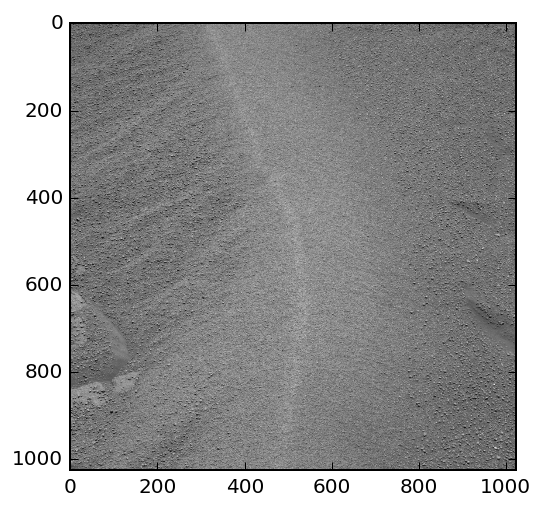

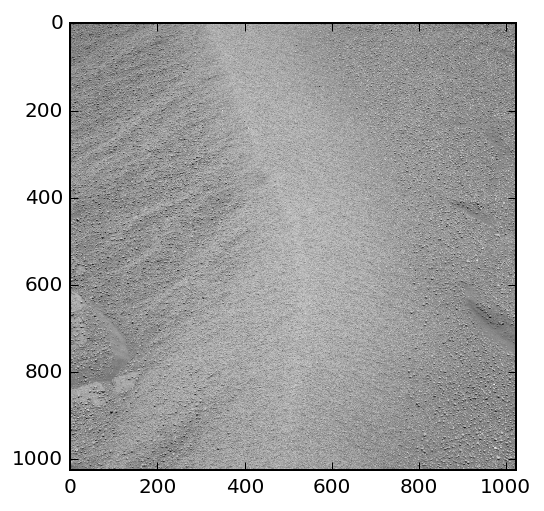

In [4]:
sol = 725
seq = 'p2596l'
imgs = []
for filename in data[sol][seq]:
    print filename
    URL = '{baseURL}{dataURL}sol{sol}/{product}/{filename}/0/raster/data[]{formatURL}'.format(baseURL=baseURL,
            dataURL=dataURL, sol='{0:0>4}'.format(sol), product=product, filename=filename, formatURL=formatURL)
    #print URL
    try:
        plt.figure()
        img = requests.get(URL).json()['data']
        #print np.array(img).shape()
        plt.imshow(img,cmap = cm.Greys_r)
        imgs+=[img]
    except:
        print URL


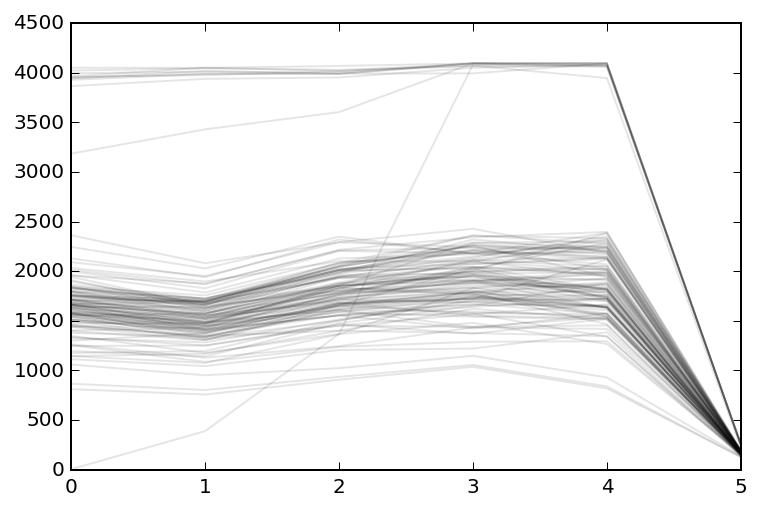

In [12]:
plt.figure()
for i in np.arange(0,np.shape(np.array(imgs)[0])[0],100):
    for j in np.arange(0,np.shape(np.array(imgs)[0])[1],100):
        plt.plot(np.array(imgs)[:,i,j],color='k',alpha=0.1)